In [2]:
import numpy as np

import pandas as pd

import matplotlib as plt

import seaborn as sns

import sklearn

from scipy import stats

from scipy import stats

%matplotlib inline


In [3]:
fuel_data =pd.read_csv(r"C:\Users\DELL\hamoye\fuel_ferc1.csv")

fuel_data.head(10)


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590000,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592000,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130000,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950000,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000000,2.77,2.77,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933,23.922000,44.24,43.25,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260,0.064094,28.77,0.00,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133,24.840000,58.54,55.13,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520,24.290000,33.97,34.65,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233,22.484000,28.73,28.11,1.278


In [29]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  int64  
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


In [30]:
#check for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [31]:
fuel_data.duplicated().any()

False

In [32]:
#use groupby to count the sum of each unique value in the fuel unit column

fuel_data.groupby('fuel_unit')['fuel_unit'].count()


fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [33]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')


In [34]:
#check if missing values have been filled
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [40]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

In [61]:
#group by the fuel type code year and print the first entries in all the groups formed
fuel_data.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438,0.015939,34.180,34.180,1.072


Text(0.5, 0, 'Fuel Unit')

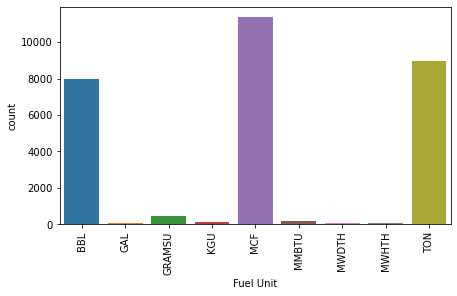

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU',
'MWDTH', 'MWHTH', 'TON'],
'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')


Text(0.5, 0, 'Fuel Unit')

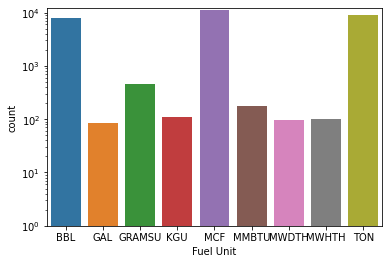

In [46]:
#Because of the extreme range of the values for the fuel unit, we can plot the
# barchart by taking the logarithm of the y-axis as follows:
g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

<AxesSubplot:xlabel='utility_id_ferc1', ylabel='fuel_cost_per_mmbtu'>

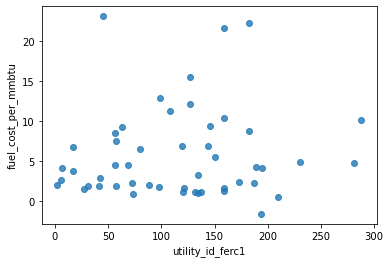

In [47]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"],
fit_reg=False)

In [82]:
# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="fuel_cost_per_unit_burnedfuel_cost_per_unit_burned")
palette=["m", "g"], data=fuel_data)


SyntaxError: unmatched ')' (<ipython-input-82-2495c4d433f4>, line 3)

<AxesSubplot:xlabel='fuel_cost_per_unit_burned', ylabel='Density'>

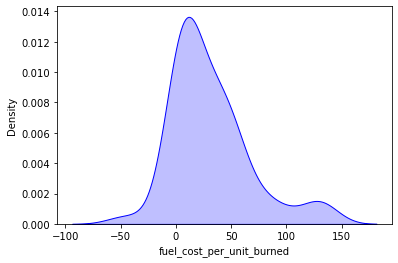

In [50]:
# KDE plot
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

# <FONT COLOR = bLUE> GRADED QUIZ- STAGE A

 <FONT COLOR = red> Q1: If you’re given two lists:

A = [1,2,3,4,5,6], B = [13, 21, 34]

The task is to create a list with the elements of A and B in a single dimension with output:

A_B = [1,2,3,4,5,6,13, 21, 34]

Which of the following option is the best way to create this list?

1.None of the above

2.Any of the above

3.A.extend(B)

4.A.append(B)

5.All of the above <B>

<FONT COLOR = BLUE>ANS:1.None of the above

<FONT COLOR = red>Q2: How do you create an identity matrix in python?

Options 1.np.identity(3)

2.All of the above

3.np.array[(1,0,0),(0,1,0),(0,0,1)]

4.eye(3)

5.np.array([1,0,0],[0,1,0],[0,0,1])
    
    
<FONT COLOR = BLUE>ANS: np.identity(3)

In [3]:
# ANS :

np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

<FONT COLOR = red > Q3. Which of the following fuel type code has the lowest average fuel cost per unit burned?

Options

1.Waste

2.Gas

3.Coal

4.Oil

5.None of the above
    
<FONT COLOR = bLUE > ANS : GAS    

In [8]:
# CODE FOR the lowest average fuel cost per unit burned

fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

<FONT COLOR = red > 
Q4. What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

Options

1.8.49 and 17.01

2.5.76 and 10.60

3.10.60 and 8.49

4.10.60 and 17.01

5.5.76 and 8.49
    
<font color = Blue> Ans : 4) 10.60 and 17.01

In [4]:
# code for Standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places

fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

<font color = Red> Q5: What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

Options

1.30.63 and 400.71

2.15.95 and 551.73

3.15.85 and 651.37

4.14.74 and 400.71

5.30.61 and 551.73
    
<font color = Blue> Ans :  3) 15.85 and 651.37    


In [17]:
from scipy.stats import skew
skew(fuel_data[['fuel_qty_burned']], bias=False)

array([15.85149547])

In [18]:
from scipy.stats import kurtosis
kurtosis(fuel_data[['fuel_qty_burned']], bias=False)

array([651.36945013])

<font color = Red > Q6: Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?

(Enter answer in the format: Feature: xxx, Total: xxx, Percent: xxx)
    
    
<font color = Blue> Feature: fuel_unit, Total: 180, Percent:  0.609694    

In [34]:
# code for missing value and no of missing value 

fuel_data.isnull().sum()


record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [33]:
# code for percentage of the missing rows 

L= len(fuel_data)

percent_missing = (fuel_data.isnull().sum()/L)*100

print (percent_missing)


record_id                       0.000000
utility_id_ferc1                0.000000
report_year                     0.000000
plant_name_ferc1                0.000000
fuel_type_code_pudl             0.000000
fuel_unit                       0.609694
fuel_qty_burned                 0.000000
fuel_mmbtu_per_unit             0.000000
fuel_cost_per_unit_burned       0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_mmbtu             0.000000
dtype: float64


<font color = Red>
Q7 The feature with missing values falls under what category? What missing value imputation technique would you use?

Options .Numerical and mode imputation

2.Numerical and mean imputation

3.Categorical and mode imputation

4.None of the above

5.Categorical and mean imputation

<font color = Blue> ANS:3.Categorical and mode imputation

Q8. Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?

Options

1.Fuel_mmbtu_per_unit and fuel_cost_per_unit_delivered

2.Fuel_qty_burned and fuel_cost_per_unit_delivered

3.fuel_qty_burned and fuel_mmbtu_per_unit

4.report_year and utility_id_ferc1

5.Fuel_cost_per_unit_delivered and utility_id_ferc1

<font color = Blue > 3.fuel_qty_burned and fuel_mmbtu_per_unit

In [5]:
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [58]:
pearson_coef,p_value =stats.pearsonr(fuel_data['fuel_cost_per_unit_burned'],fuel_data['fuel_qty_burned'])

print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is -0.01853541679482522


In [59]:
pearson_coef,p_value =stats.pearsonr(fuel_data['fuel_cost_per_unit_burned'],fuel_data['fuel_mmbtu_per_unit'])
print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is -0.01003380842885307


In [75]:
pearson_coef,p_value =stats.pearsonr(fuel_data['fuel_cost_per_unit_burned'],fuel_data['report_year'])

print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.013599134438134125


In [77]:
pearson_coef,p_value =stats.pearsonr(fuel_data['fuel_cost_per_unit_burned'],fuel_data['utility_id_ferc1'])

print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is -0.03786270759997259


In [78]:
pearson_coef,p_value =stats.pearsonr(fuel_data['fuel_cost_per_unit_burned'],fuel_data['fuel_cost_per_unit_delivered'])

print("The Pearson Correlation Coefficient is", pearson_coef)

The Pearson Correlation Coefficient is 0.01100740329916512


<font color =Red > Q9.
For the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994?

Options

1.-21%

2.21%

3.None of the above

4.-18%

5.18%

In [7]:
fuel_data_group_one =fuel_data [['report_year','fuel_cost_per_unit_burned','fuel_type_code_pudl']]

fuel_data_grouped_test1 = fuel_data_group_one.groupby(['report_year','fuel_type_code_pudl'],as_index = False).sum()

filt = fuel_data_grouped_test1['fuel_type_code_pudl'] == 'coal'

df = fuel_data_grouped_test1[filt]

df




,report_year,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,1994,coal,14984.572
6,1995,coal,14571.785
12,1996,coal,12694.803
18,1997,coal,43742.178
24,1998,coal,11902.597
30,1999,coal,16303.468
36,2000,coal,100428.831
42,2001,coal,15109.012
48,2002,coal,9171.164
54,2003,coal,30954.110


In [8]:
(df.loc[0]['fuel_cost_per_unit_burned']-df.loc[24]['fuel_cost_per_unit_burned'])/df.loc[0]['fuel_cost_per_unit_burned']*100

20.56765451826049

<font color =Red > Q10:
    
Which year has the highest average fuel cost per unit delivered?

Options

1.1997

2.2018

3.1996

4.2004

5.2009
    
<font color = blue> Ans : 1997

In [9]:
# code for highest average fuel cost per unit delivered

fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64